In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [2]:
# for visualization of molecules including atom numbers
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [3]:
def add_bond_between_substructures(mol_1, mol_2, begin_atom_idx,
                                   end_atom_idx, bond_type):
    """
    Given two rdkit mol objects, begin and end atom indices of the new bond, the bond type, returns a new mol object
    that has the corresponding bond added. Note that the atom indices are based on the combined mol object, see below
    MUST PERFORM VALENCY CHECK AFTERWARDS
    Code from Stanford paper https://github.com/bowenliu16/rl_graph_generation
    :param mol_1:
    :param mol_2:
    :param begin_atom_idx:
    :param end_atom_idx:
    :param bond_type:
    :return: rdkit mol object
    """
    combined = Chem.CombineMols(mol_1, mol_2)
    rw_combined = Chem.RWMol(combined)
    
    # check that we have an atom index from each substructure
    grouped_atom_indices_combined = Chem.GetMolFrags(rw_combined)
    substructure_1_indices, substructure_2_indices = grouped_atom_indices_combined
    if begin_atom_idx in substructure_1_indices:
        if not end_atom_idx in substructure_2_indices:
            raise ValueError('Invalid atom indices')
    elif end_atom_idx in substructure_1_indices:
        if not begin_atom_idx in substructure_2_indices:
            raise ValueError('Invalid atom indices')
    else:
        raise ValueError('Invalid atom indices')
        
    rw_combined.AddBond(begin_atom_idx, end_atom_idx, bond_type)

    return rw_combined.GetMol()

def add_bond_within_structure(mol, begin_atom_idx,
                                   end_atom_idx, bond_type):
    """
    Given one rdkit mol object, begin and end atom indices of the new bond, the bond type, returns a new mol object
    that has the corresponding bond added.
    MUST PERFORM VALENCY CHECK AFTERWARDS
    :param mol_1:
    :param begin_atom_idx:
    :param end_atom_idx:
    :param bond_type:
    :return: rdkit mol object
    """
    rw_combined = Chem.RWMol(mol)
    rw_combined.AddBond(begin_atom_idx, end_atom_idx, bond_type)
    return rw_combined.GetMol()

In [841]:
import pandas as pd
df = pd.read_csv('MyFunctionalGroups.csv')
s = df['smarts'].tolist()
print(len(s))

81


In [856]:
mol_1 = Chem.MolFromSmiles('CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4')

mol_2 = Chem.MolFromSmarts('[S](=O)(=O)([OH])')  #[CX3]=[CX3]

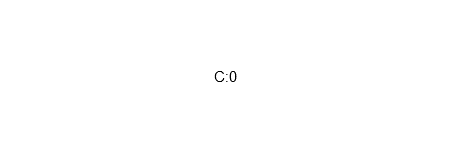

In [857]:
# functional group
mol_with_atom_index(mol_2)

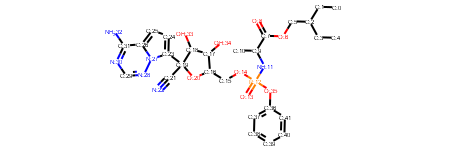

In [858]:
# base molecule
mol_with_atom_index(mol_1)

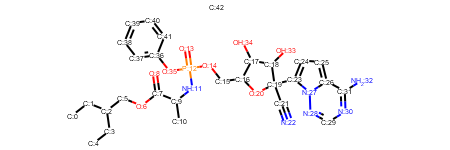

In [859]:
# note that only mol_1 keeps its original atom numbers in the combined mol object. 
# mol_2 has its atom numbers reindexed by: old atom number + mol_1.GetNumAtoms()
combined = Chem.CombineMols(mol_1, mol_2)
mol_with_atom_index(combined)

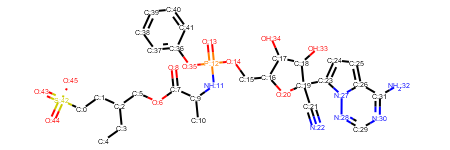

In [840]:
# example of successful bond addition
begin_atom_idx = 0
end_atom_idx = 42

bond_type = Chem.rdchem.BondType.SINGLE
m = add_bond_between_substructures(mol_1, mol_2, begin_atom_idx, end_atom_idx, bond_type)
Chem.SanitizeMol(m,sanitizeOps=Chem.SanitizeFlags.SANITIZE_PROPERTIES)  # check valency

mol_with_atom_index(m)

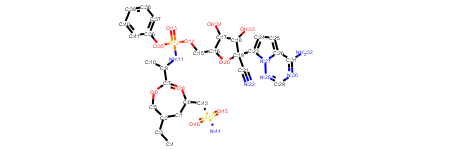

In [804]:
# example of internal bond addition

begin_atom_idx = 0
end_atom_idx = 8
bond_type = Chem.rdchem.BondType.SINGLE

m = add_bond_within_structure(m, begin_atom_idx, end_atom_idx, bond_type)

mol_with_atom_index(m)

In [805]:
#aromaticity check for an atom
m.GetAtomWithIdx(0).GetIsAromatic()

#aromaticity check for a bond
m.GetBondBetweenAtoms(14,15).GetIsAromatic()

False